# Adjusting pmax for lumefantrine and artemisinin 

In [73]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator
import pickle

In [4]:
command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100", "--pmf",  "2", "--ec50_lum", "12", "--ec50_art", "0.8", "--pmax_lum", "0.9", "--pmax_art", "0.9"]

output_100_patients = subprocess.run(command_100_patients, capture_output=True, text=True)
lines_100_patients = output_100_patients.stdout.splitlines()
df_100_patients = pd.DataFrame([line.split(',') for line in lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
df_100_patients = df_100_patients.iloc[1:]
df_100_patients = df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [74]:

pickle.dump(df_100_patients, open('df_100_patients_py.obj', 'wb')) 
#df_100_patients = pickle.load(open('df_100_patients_py.obj', 'rb'))

In [6]:
#Converting 0s to 0.0001 to avoid log(0) error
#df_100_patients['PARASITEDENSITY'] = df_100_patients['PARASITEDENSITY'].replace(0.000, 0.0001)
#Creating new column with log(parasite density)
df_100_patients['LOG_PARASITEDENSITY'] = np.log10(df_100_patients['PARASITEDENSITY'] + 0.00001)

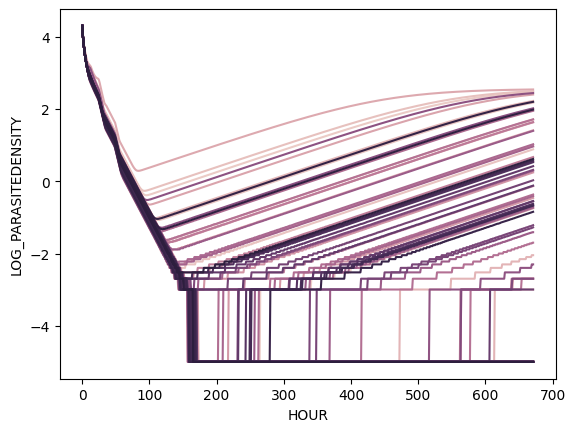

In [8]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
plt.show()

In [10]:
df_100_patients_day28_failed = df_100_patients[(df_100_patients['PARASITEDENSITY'] >= 10) & (df_100_patients['HOUR'] == 671.0)]
df_100_patients_day28_failed_pids = df_100_patients_day28_failed['PID'].unique().tolist()
df_100_patients_day28_failed_pids = np.array(df_100_patients_day28_failed_pids)


In [11]:
df_100_patients_day28_failed['PID'].unique().tolist()

[3, 5, 7, 11, 17, 18, 20, 22, 24, 40, 44, 47, 49, 56, 62, 63, 96, 97]

In [13]:
df_100_patients['STATUS'] = np.where(df_100_patients['PID'].isin(df_100_patients_day28_failed_pids), 'Failed', 'Cleared')

In [14]:
df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY,STATUS
1,0,0.0,0.000,0.000,20000.000,4.301030,Cleared
2,0,1.0,5.155,605.543,10760.221,4.031821,Cleared
3,0,2.0,23.357,1146.929,6556.793,3.816691,Cleared
4,0,3.0,19.667,1629.439,4470.862,3.650391,Cleared
5,0,4.0,12.334,2057.959,3239.987,3.510543,Cleared
...,...,...,...,...,...,...,...
67196,99,667.0,0.000,209.802,0.000,-5.000000,Cleared
67197,99,668.0,0.000,208.955,0.000,-5.000000,Cleared
67198,99,669.0,0.000,208.113,0.000,-5.000000,Cleared
67199,99,670.0,0.000,207.273,0.000,-5.000000,Cleared


In [15]:
df_100_patients_cleared = df_100_patients[df_100_patients['STATUS'] == 'Cleared']
df_100_patients_failed = df_100_patients[df_100_patients['STATUS'] == 'Failed']

In [17]:
df_100_patients_cleared[(df_100_patients_cleared['PID']) == 4]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY,STATUS
2689,4,0.0,0.000,0.000,20000.000,4.301030,Cleared
2690,4,1.0,13.817,359.110,10611.602,4.025781,Cleared
2691,4,2.0,23.577,690.123,6490.557,3.812282,Cleared
2692,4,3.0,14.021,994.706,4434.017,3.646797,Cleared
2693,4,4.0,7.840,1274.435,3216.855,3.507431,Cleared
...,...,...,...,...,...,...,...
3356,4,667.0,0.000,142.776,0.000,-5.000000,Cleared
3357,4,668.0,0.000,142.172,0.000,-5.000000,Cleared
3358,4,669.0,0.000,141.571,0.000,-5.000000,Cleared
3359,4,670.0,0.000,140.973,0.000,-5.000000,Cleared


In [18]:
df_100_patients_failed[(df_100_patients_failed['PID']) == 3]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY,STATUS
2017,3,0.0,0.000,0.000,20000.000,4.301030,Failed
2018,3,1.0,25.642,6395.178,10745.391,4.031222,Failed
2019,3,2.0,19.555,7933.295,6939.659,3.841338,Failed
2020,3,3.0,10.628,8133.599,4881.937,3.688592,Failed
2021,3,4.0,5.765,7971.511,3654.335,3.562808,Failed
...,...,...,...,...,...,...,...
2684,3,667.0,0.000,110.902,292.880,2.466690,Failed
2685,3,668.0,0.000,110.420,293.687,2.467885,Failed
2686,3,669.0,0.000,109.939,294.488,2.469068,Failed
2687,3,670.0,0.000,109.461,295.281,2.470236,Failed


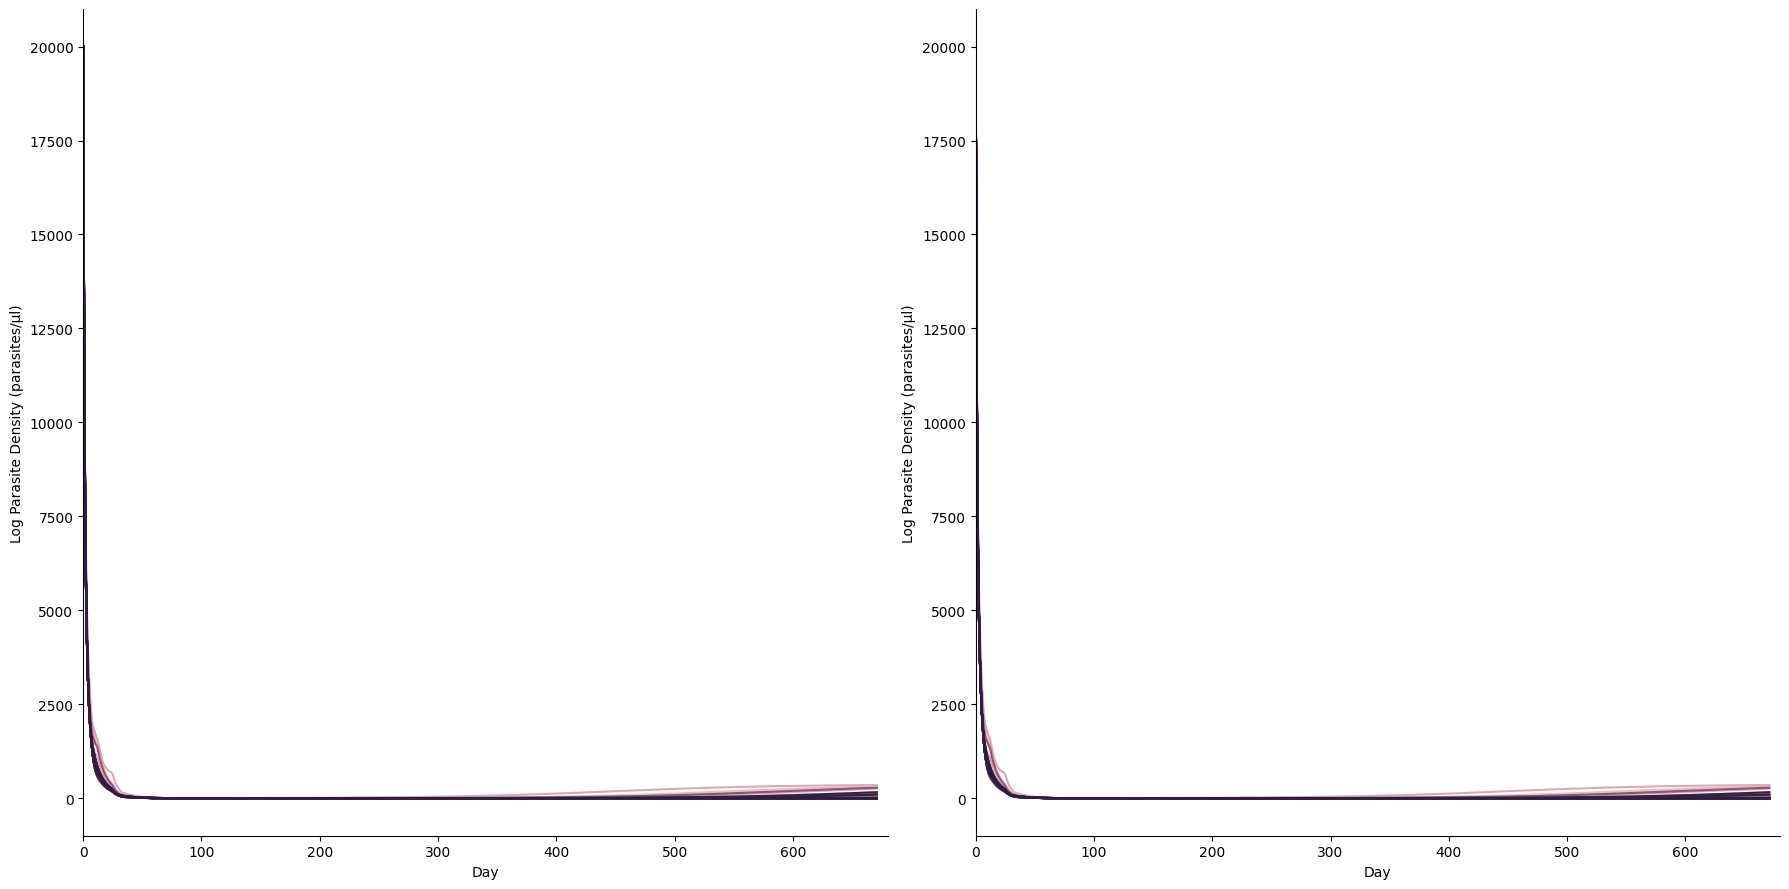

In [22]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

ax1 = sns.lineplot(ax=axes[0], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
sns.despine(ax=ax1)
ax1.set_xlim(0, 680)
#ax1.set_yticks(range(0, int(df_100_patients['PARASITEDENSITY'].max()) + 100, 1000))
#Set x-axis label
ax1.set_xlabel('Day')
#Set y-axis label
ax1.set_ylabel('Log Parasite Density (parasites/μl)') 


ax2 = sns.lineplot(ax=axes[1], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
sns.despine(ax=ax2)
ax2.set_xlim(0, 680)
#Set x-axis label
ax2.set_xlabel('Day')
#Set y-axis label
ax2.set_ylabel('Log Parasite Density (parasites/μl)') 

fig.savefig('parasitemia.png')
plt.tight_layout()
plt.show()

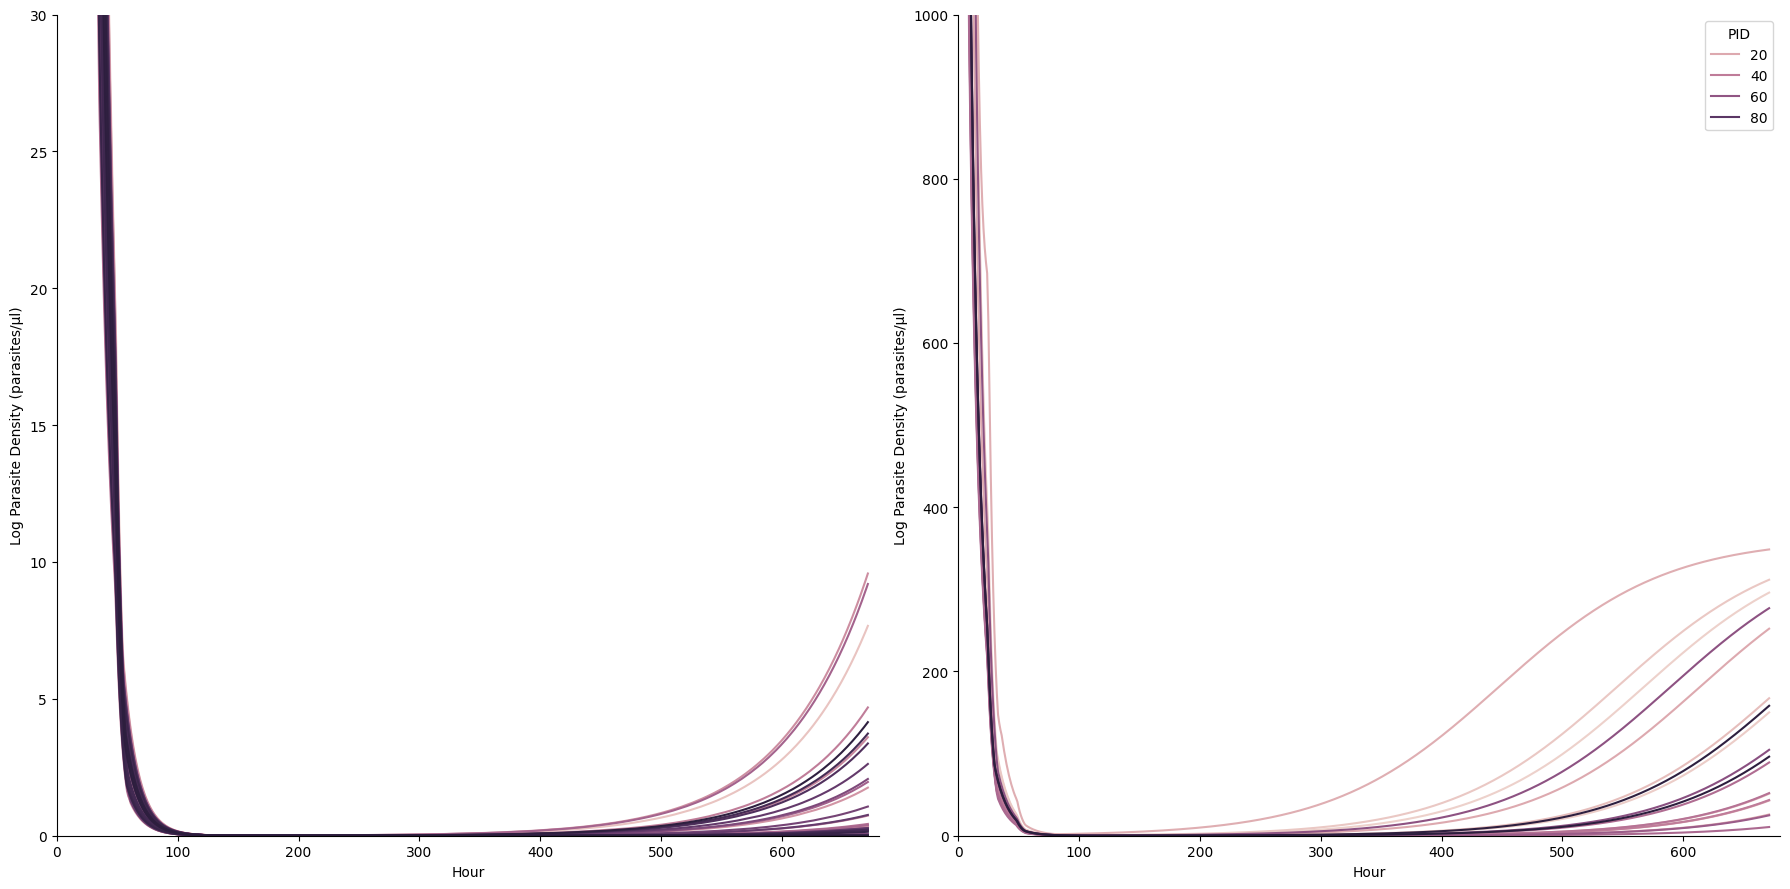

In [24]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

ax1 = sns.lineplot(ax=axes[0], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients_cleared, legend=False)
sns.despine(ax=ax1)
ax1.set_xlim(0, 680)
#ax1.set_yticks(range(0, int(df_100_patients['PARASITEDENSITY'].max()) + 100, 1000))
ax1.set_ylim(0, 30)
#Set x-axis label
ax1.set_xlabel('Hour')
#Set y-axis label
ax1.set_ylabel('Log Parasite Density (parasites/μl)') 


ax2 = sns.lineplot(ax=axes[1], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients_failed, legend=True)
sns.despine(ax=ax2)
ax2.set_xlim(0, 680)
ax2.set_ylim(0, 1000)
#Set x-axis label
ax2.set_xlabel('Hour')
#Set y-axis label
ax2.set_ylabel('Log Parasite Density (parasites/μl)') 

fig.savefig('parasitemia.png')
plt.tight_layout()
plt.show()

In [25]:
df_100_patients_cleared_wide = df_100_patients_cleared.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_100_patients_cleared_wide

PID,0,1,2,4,6,8,9,10,12,13,...,88,89,90,91,92,93,94,95,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,...,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
1.0,10760.221,10606.931,10514.927,10611.602,10643.618,10628.801,10547.174,10498.341,10561.827,10762.073,...,10596.897,10665.463,11002.640,10548.965,10563.007,10513.310,10792.960,10513.172,10847.035,10688.462
2.0,6556.793,6488.738,6448.085,6490.557,6508.821,6498.506,6461.745,6440.073,6468.770,6557.878,...,6484.873,6517.395,6664.514,6462.533,6468.942,6446.548,6572.140,6446.611,6597.626,6524.761
3.0,4470.862,4433.004,4410.319,4434.017,4444.196,4438.446,4417.947,4405.842,4421.868,4471.464,...,4430.849,4448.966,4530.488,4418.387,4421.964,4409.460,4479.379,4409.496,4493.509,4453.061
4.0,3239.987,3216.218,3201.949,3216.855,3223.251,3219.638,3206.749,3199.131,3209.216,3240.365,...,3214.864,3226.246,3277.315,3207.026,3209.276,3201.409,3245.328,3201.431,3254.181,3228.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,0.000,0.000,0.168,0.000,7.244,0.000,0.000,0.000,0.008,0.001,...,0.208,3.524,0.200,0.000,0.000,0.000,0.135,0.000,3.919,0.000
668.0,0.000,0.000,0.170,0.000,7.347,0.000,0.000,0.000,0.008,0.001,...,0.211,3.575,0.203,0.000,0.000,0.000,0.137,0.000,3.975,0.000
669.0,0.000,0.000,0.173,0.000,7.452,0.000,0.000,0.000,0.009,0.001,...,0.215,3.627,0.206,0.000,0.000,0.000,0.139,0.000,4.033,0.000


In [26]:
df_100_patients_failed_wide = df_100_patients_failed.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_100_patients_failed_wide

PID,3,5,7,11,17,18,20,22,24,40,44,47,49,56,62,63,96,97
HOUR,,,,,,,,,,,,,,,,,,
0.0,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
1.0,10745.391,10639.771,11253.896,10886.525,10571.656,11233.542,10737.927,10678.555,10552.456,10596.174,10801.833,10902.002,10535.099,10597.719,10746.233,10649.236,10646.870,10669.546
2.0,6939.659,6556.591,7263.680,6720.277,6488.172,7291.738,6784.061,6528.456,6474.837,6496.544,6593.527,6657.931,6461.324,6490.515,6909.498,6540.121,6568.959,6544.463
3.0,4881.937,4471.860,5159.481,4567.476,4432.758,5279.821,4648.146,4455.134,4425.285,4437.401,4491.335,4527.363,4417.720,4434.005,4825.832,4461.955,4479.244,4464.263
4.0,3654.335,3240.914,3911.278,3302.945,3216.072,4063.579,3383.454,3230.121,3211.368,3218.986,3252.833,3275.473,3206.607,3216.848,3584.843,3234.471,3245.728,3235.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,292.880,145.144,309.139,162.209,48.695,347.810,247.632,24.465,40.713,41.343,49.392,85.383,10.018,23.557,273.244,100.369,153.097,92.250
668.0,293.687,146.402,309.792,163.504,49.307,348.011,248.762,24.796,41.238,41.875,50.011,86.329,10.159,23.877,274.211,101.420,154.375,93.246
669.0,294.488,147.664,310.438,164.800,49.925,348.209,249.885,25.132,41.769,42.413,50.637,87.282,10.303,24.202,275.171,102.478,155.656,94.250


In [27]:

# Calculate the median, 25th percentile, and 75th percentile for cleared and failed
median_parasite_density_cleared = df_100_patients_cleared_wide.median(axis=1)
perc_05_parasite_density_cleared = df_100_patients_cleared_wide.quantile(0.05,axis=1)
perc_95_parasite_density_cleared = df_100_patients_cleared_wide.quantile(0.95,axis=1)

median_parasite_density_failed = df_100_patients_failed_wide.median(axis=1)
perc_05_parasite_density_failed = df_100_patients_failed_wide.quantile(0.05,axis=1)
perc_95_parasite_density_failed = df_100_patients_failed_wide.quantile(0.95,axis=1)


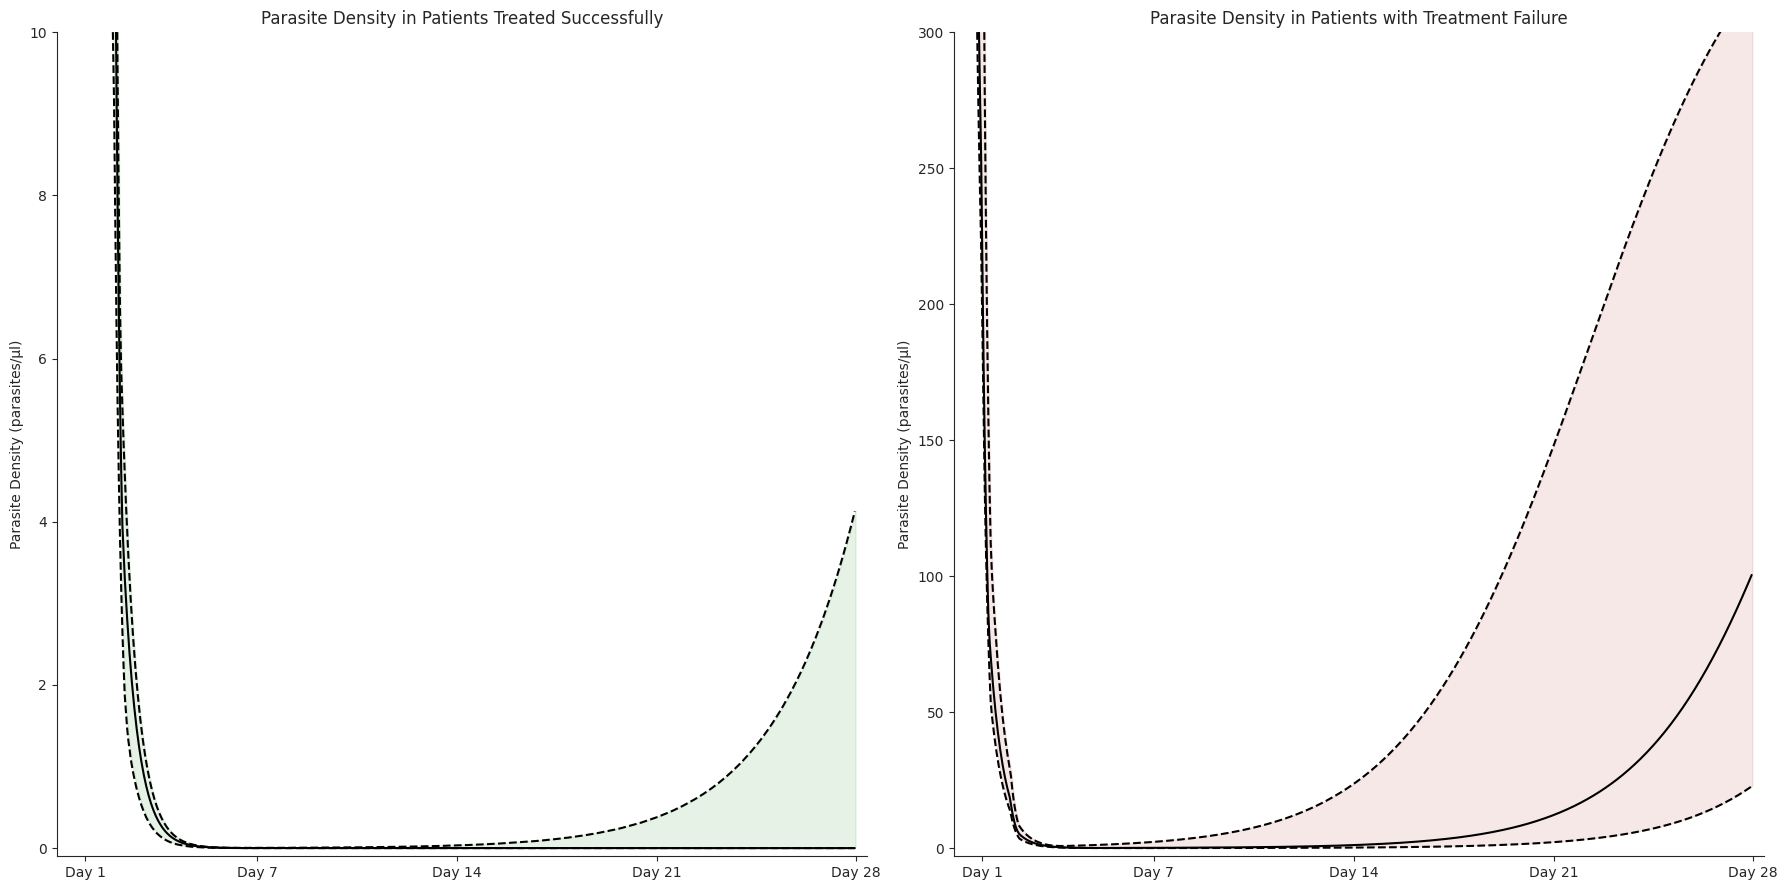

In [84]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

colors = ["#B22222", "#98FF98"]
sns.set_palette(sns.color_palette(colors))

ax1 = sns.lineplot(ax=axes[0], x= df_100_patients['HOUR'], y= median_parasite_density_cleared, color="black")
sns.lineplot(ax=axes[0], x=df_100_patients['HOUR'], y=perc_05_parasite_density_cleared, color="black", linestyle='--')
sns.lineplot(ax=axes[0], x=df_100_patients['HOUR'], y=perc_95_parasite_density_cleared, color="black", linestyle='--')
axes[0].fill_between(np.arange(672),perc_05_parasite_density_cleared, perc_95_parasite_density_cleared, color="#008400", alpha=0.1)

sns.despine(ax=ax1)


ax1.set_xlim(0, 680)
#ax1.set_yticks(range(0, int(df_100_patients['PARASITEDENSITY'].max()) + 100, 1000))
ax1.set_ylim(-0.1, 10)
#Set x-axis label
ax1.set_xlabel('')
#Set y-axis label
ax1.set_ylabel('Parasite Density (parasites/μl)')

# Set tick positions and labels for specific days
tick_positions = [24.0,168.0, 336.0, 504.0,671.0]  # Day 0, Day 7, Day 14, Day 28 in hours
tick_labels = ['Day 1', 'Day 7', 'Day 14', 'Day 21','Day 28']
ax1.set_xticks(tick_positions, tick_labels)

#Plot title
ax1.set_title('Parasite Density in Patients Treated Successfully')


ax2 = sns.lineplot(ax=axes[1], x= df_100_patients['HOUR'], y= median_parasite_density_failed, color="black")
sns.lineplot(ax=axes[1], x=df_100_patients['HOUR'], y=perc_05_parasite_density_failed, color="black", linestyle='--')
sns.lineplot(ax=axes[1], x=df_100_patients['HOUR'], y=perc_95_parasite_density_failed, color="black", linestyle='--')
axes[1].fill_between(np.arange(672), perc_05_parasite_density_failed, perc_95_parasite_density_failed, color="#B22222", alpha=0.1)

sns.despine(ax=ax2)

ax2.set_xlim(0, 680)
ax2.set_ylim(-3, 300)
#Set x-axis label
ax2.set_xlabel('')
#Set y-axis label
ax2.set_ylabel('Parasite Density (parasites/μl)')
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_labels)
#Plot title
ax2.set_title('Parasite Density in Patients with Treatment Failure')


plt.savefig('parasitemia_fail.vs.cleared.png')
plt.tight_layout()
plt.show()

In [31]:
df_100_patients_cleared_wide_log = df_100_patients_cleared.pivot(index="HOUR", columns="PID", values="LOG_PARASITEDENSITY")
df_100_patients_cleared_wide_log

PID,0,1,2,4,6,8,9,10,12,13,...,88,89,90,91,92,93,94,95,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,...,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030
1.0,4.031821,4.025590,4.021806,4.025781,4.027089,4.026484,4.023136,4.021121,4.023739,4.031896,...,4.025179,4.027980,4.041497,4.023210,4.023788,4.021739,4.033141,4.021734,4.035311,4.028915
2.0,3.816691,3.812160,3.809431,3.812282,3.813502,3.812814,3.810350,3.808891,3.810822,3.816763,...,3.811901,3.814074,3.823768,3.810403,3.810833,3.809327,3.817707,3.809331,3.819388,3.814565
3.0,3.650391,3.646698,3.644470,3.646797,3.647793,3.647231,3.645221,3.644029,3.645606,3.650450,...,3.646487,3.648259,3.656145,3.645264,3.645615,3.644385,3.651218,3.644389,3.652586,3.648659
4.0,3.510543,3.507345,3.505414,3.507431,3.508294,3.507807,3.506065,3.505032,3.506399,3.510594,...,3.507163,3.508697,3.515518,3.506102,3.506407,3.505341,3.511259,3.505344,3.512442,3.509044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,-5.000000,-5.000000,-0.774665,-5.000000,0.859979,-5.000000,-5.000000,-5.000000,-2.096367,-2.995679,...,-0.681916,0.547037,-0.698948,-5.000000,-5.000000,-5.000000,-0.869634,-5.000000,0.593176,-5.000000
668.0,-5.000000,-5.000000,-0.769526,-5.000000,0.866111,-5.000000,-5.000000,-5.000000,-2.096367,-2.995679,...,-0.675697,0.553277,-0.692483,-5.000000,-5.000000,-5.000000,-0.863248,-5.000000,0.599338,-5.000000
669.0,-5.000000,-5.000000,-0.761929,-5.000000,0.872273,-5.000000,-5.000000,-5.000000,-2.045275,-2.995679,...,-0.667541,0.559549,-0.686112,-5.000000,-5.000000,-5.000000,-0.856954,-5.000000,0.605629,-5.000000


In [30]:
df_100_patients_failed_wide_log = df_100_patients_failed.pivot(index="HOUR", columns="PID", values="LOG_PARASITEDENSITY")
df_100_patients_failed_wide_log

PID,3,5,7,11,17,18,20,22,24,40,44,47,49,56,62,63,96,97
HOUR,,,,,,,,,,,,,,,,,,
0.0,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030
1.0,4.031222,4.026932,4.051303,4.036889,4.024143,4.050517,4.030920,4.028512,4.023354,4.025149,4.033497,4.037506,4.022639,4.025212,4.031256,4.027318,4.027222,4.028146
2.0,3.841338,3.816678,3.861157,3.827387,3.812122,3.862831,3.831490,3.814810,3.811229,3.812682,3.819118,3.823339,3.810322,3.812279,3.839446,3.815586,3.817497,3.815874
3.0,3.688592,3.650488,3.712606,3.659676,3.646674,3.722619,3.667280,3.648861,3.645941,3.647129,3.652375,3.655845,3.645198,3.646796,3.683572,3.649525,3.651205,3.649750
4.0,3.562808,3.510668,3.592319,3.518901,3.507326,3.608909,3.529360,3.509219,3.506690,3.507719,3.512262,3.515274,3.506046,3.507431,3.554470,3.509803,3.511312,3.509994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,2.466690,2.161799,2.490154,2.210075,1.687484,2.541342,2.393807,1.388545,1.609733,1.616402,1.693657,1.931371,1.000781,1.372120,2.436551,2.001600,2.184967,1.964966
668.0,2.467885,2.165547,2.491070,2.213528,1.692909,2.541593,2.395784,1.394382,1.615298,1.621955,1.699066,1.936157,1.006851,1.377980,2.438085,2.006124,2.188577,1.969630
669.0,2.469068,2.169275,2.491975,2.216957,1.698318,2.541840,2.397740,1.400227,1.620854,1.627499,1.704468,1.940925,1.012964,1.383851,2.439603,2.010631,2.192166,1.974281


In [32]:

# Calculate the median, 25th percentile, and 75th percentile for cleared and failed using log parasite density
median_parasite_density_cleared_log = df_100_patients_cleared_wide_log.median(axis=1)
perc_05_parasite_density_cleared_log = df_100_patients_cleared_wide_log.quantile(0.05,axis=1)
perc_95_parasite_density_cleared_log = df_100_patients_cleared_wide_log.quantile(0.95,axis=1)

median_parasite_density_failed_log = df_100_patients_failed_wide_log.median(axis=1)
perc_05_parasite_density_failed_log = df_100_patients_failed_wide_log.quantile(0.05,axis=1)
perc_95_parasite_density_failed_log = df_100_patients_failed_wide_log.quantile(0.95,axis=1)

In [33]:
median_parasite_density_cleared_log

HOUR
0.0      4.301030
1.0      4.026383
2.0      3.812752
3.0      3.647181
4.0      3.507764
           ...   
667.0   -5.000000
668.0   -5.000000
669.0   -5.000000
670.0   -5.000000
671.0   -5.000000
Length: 672, dtype: float64

In [34]:
median_parasite_density_failed_log

HOUR
0.0      4.301030
1.0      4.028329
2.0      3.817087
3.0      3.650846
4.0      3.510990
           ...   
667.0    1.983283
668.0    1.987877
669.0    1.992456
670.0    1.997016
671.0    2.001558
Length: 672, dtype: float64

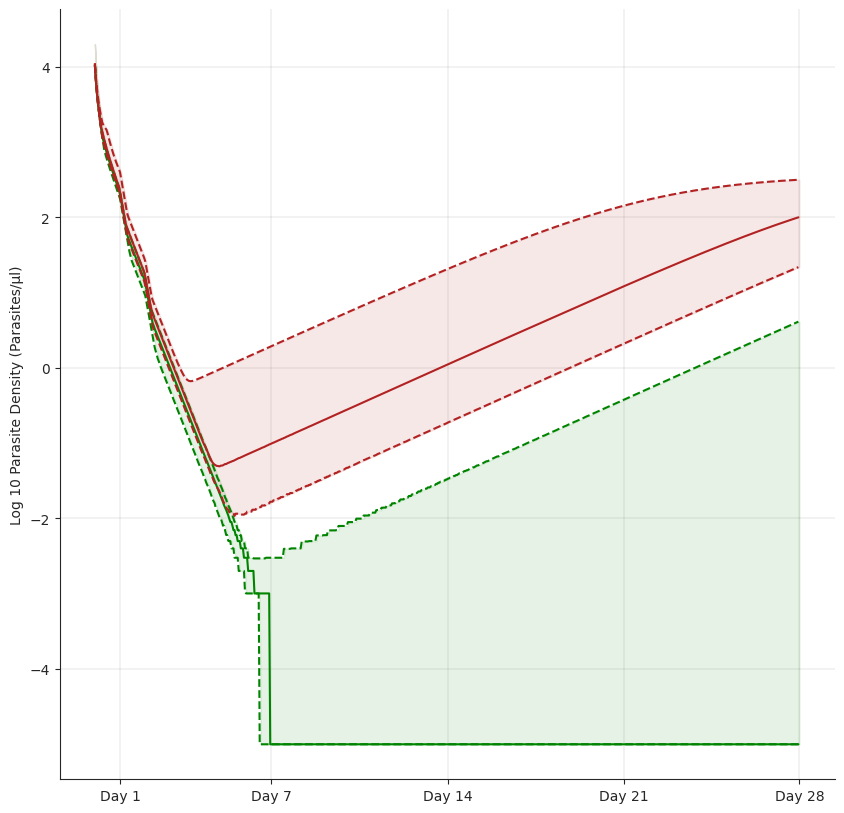

In [86]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
plt.figure(figsize=(10, 10))
sns.set_style("ticks")

palette_cleared = ["#e5ffe5","#cbffcb","#b2ffb2","#98FF98","#7fff7f","#65ff65","#4cff4c"]
palette_failed = ["#ffcbcb","#ff9797","#ff6464","#ff3232","#ff0000","#cb0000","#970000"] 
#sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', palette=sns.color_palette(palette_cleared, 83), data=df_100_patients_cleared, legend=False)
#sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', palette=sns.color_palette(palette_failed, 17), data=df_100_patients_failed, legend=False)

sns.lineplot(x= df_100_patients['HOUR'], y= median_parasite_density_cleared_log, color="#008400")
sns.lineplot(x=df_100_patients['HOUR'], y=perc_05_parasite_density_cleared_log, color="#008400", linestyle='--')
sns.lineplot(x=df_100_patients['HOUR'], y=perc_95_parasite_density_cleared_log, color="#008400", linestyle='--')
plt.fill_between(np.arange(672),perc_05_parasite_density_cleared_log, perc_95_parasite_density_cleared_log, color="#008400", alpha=0.1)

sns.lineplot(x= df_100_patients['HOUR'], y= median_parasite_density_failed_log, color="#B22222")
sns.lineplot(x=df_100_patients['HOUR'], y=perc_05_parasite_density_failed_log, color="#B22222", linestyle='--')
sns.lineplot(x=df_100_patients['HOUR'], y=perc_95_parasite_density_failed_log, color="#B22222", linestyle='--')
plt.fill_between(np.arange(672),perc_05_parasite_density_failed_log, perc_95_parasite_density_failed_log, color="#B22222", alpha=0.1)


sns.despine()

plt.grid(visible=True, which='major', color='black', linewidth=0.075)
plt.grid(visible=True, which='minor', color='black', linewidth=0.075)

# Set tick positions and labels for specific days
tick_positions = [24.0, 168.0, 336.0, 504.0,671.0]  # Day 0, Day 7, Day 14, Day 28 in hours
tick_labels = ['Day 1', 'Day 7', 'Day 14', 'Day 21','Day 28']
plt.xticks(tick_positions, tick_labels)

#y_ticks = plt.gca().get_yticks()
#y_tick_labels = [f'{10**tick:.0f}' for tick in y_ticks]
#plt.yticks(y_ticks, y_tick_labels)

plt.xlabel('')
plt.ylabel('Log 10 Parasite Density (Parasites/μl)')

plt.savefig('log_parasitemia_median.png')
plt.show()

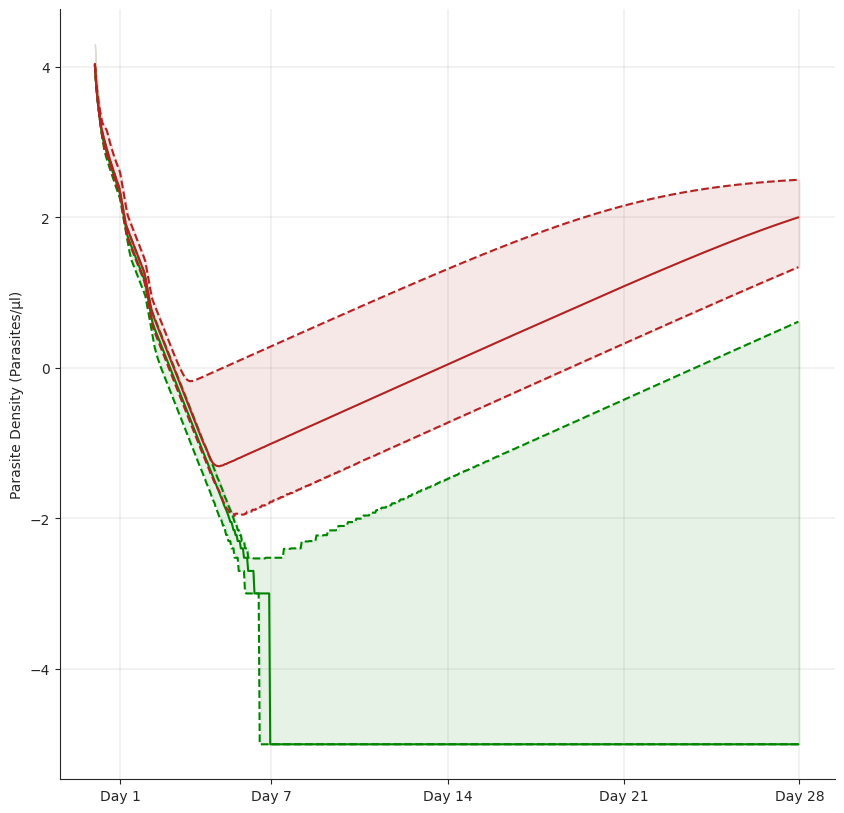

In [98]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
plt.figure(figsize=(10, 10))
sns.set_style("ticks")

palette_cleared = ["#e5ffe5","#cbffcb","#b2ffb2","#98FF98","#7fff7f","#65ff65","#4cff4c"]
palette_failed = ["#ffcbcb","#ff9797","#ff6464","#ff3232","#ff0000","#cb0000","#970000"] 
#sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', palette=sns.color_palette(palette_cleared, 83), data=df_100_patients_cleared, legend=False)
#sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', palette=sns.color_palette(palette_failed, 17), data=df_100_patients_failed, legend=False)

sns.lineplot(x= df_100_patients['HOUR'], y= median_parasite_density_cleared_log, color="#008400")
sns.lineplot(x=df_100_patients['HOUR'], y=perc_05_parasite_density_cleared_log, color="#008400", linestyle='--')
sns.lineplot(x=df_100_patients['HOUR'], y=perc_95_parasite_density_cleared_log, color="#008400", linestyle='--')
plt.fill_between(np.arange(672),perc_05_parasite_density_cleared_log, perc_95_parasite_density_cleared_log, color="#008400", alpha=0.1)

sns.lineplot(x= df_100_patients['HOUR'], y= median_parasite_density_failed_log, color="#B22222")
sns.lineplot(x=df_100_patients['HOUR'], y=perc_05_parasite_density_failed_log, color="#B22222", linestyle='--')
sns.lineplot(x=df_100_patients['HOUR'], y=perc_95_parasite_density_failed_log, color="#B22222", linestyle='--')
plt.fill_between(np.arange(672),perc_05_parasite_density_failed_log, perc_95_parasite_density_failed_log, color="#B22222", alpha=0.1)


sns.despine()

plt.grid(visible=True, which='major', color='black', linewidth=0.075)
plt.grid(visible=True, which='minor', color='black', linewidth=0.075)

# Set tick positions and labels for specific days
tick_positions = [24.0, 168.0, 336.0, 504.0,671.0]  # Day 0, Day 7, Day 14, Day 28 in hours
tick_labels = ['Day 1', 'Day 7', 'Day 14', 'Day 21','Day 28']
plt.xticks(tick_positions, tick_labels)


ax1.set_ylim(-0.1, 20000)
plt.xlabel('')
plt.ylabel('Parasite Density (Parasites/μl)')

plt.savefig('log_parasitemia_median_v2.png')
plt.show()

[2, 3, 6, 9, 13, 17, 31, 39, 52, 53, 56, 57, 61, 65, 66, 72, 98]